# Question 1: Load

In [246]:
import pandas as pd
df = pd.read_json('transactions.json', lines = True)
print(df.head())

   accountNumber  customerId  creditLimit  availableMoney  \
0      737265056   737265056         5000          5000.0   
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry  \
0  2016-08-13T14:27:32              98.55                 Uber         US   
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... echoBuffer currentBalance  \
0                  US           02  ...                       0.0   
1                  US           

In [247]:
df.shape

(786363, 29)

In [248]:
col_names = df.columns
print(col_names)

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')


In [249]:
print(df.nunique())

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

In [250]:
dat_columns=['creditLimit','acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode','transactionType','cardPresent','expirationDateKeyInMatch', 'isFraud']
# Print the unique values in each column
for col in dat_columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'creditLimit': [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
Unique values in column 'acqCountry': ['US' '' 'CAN' 'MEX' 'PR']
Unique values in column 'merchantCountryCode': ['US' 'CAN' '' 'PR' 'MEX']
Unique values in column 'posEntryMode': ['02' '09' '05' '80' '90' '']
Unique values in column 'posConditionCode': ['01' '08' '99' '']
Unique values in column 'transactionType': ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
Unique values in column 'cardPresent': [False  True]
Unique values in column 'expirationDateKeyInMatch': [False  True]
Unique values in column 'isFraud': [False  True]


In [251]:
dat_columns=['creditLimit','acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode','transactionType','echoBuffer', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']
# Print the unique values in each column
for col in dat_columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'creditLimit': [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
Unique values in column 'acqCountry': ['US' '' 'CAN' 'MEX' 'PR']
Unique values in column 'merchantCountryCode': ['US' 'CAN' '' 'PR' 'MEX']
Unique values in column 'posEntryMode': ['02' '09' '05' '80' '90' '']
Unique values in column 'posConditionCode': ['01' '08' '99' '']
Unique values in column 'transactionType': ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
Unique values in column 'echoBuffer': ['']
Unique values in column 'merchantCity': ['']
Unique values in column 'merchantState': ['']
Unique values in column 'merchantZip': ['']
Unique values in column 'cardPresent': [False  True]
Unique values in column 'posOnPremises': ['']
Unique values in column 'recurringAuthInd': ['']
Unique values in column 'expirationDateKeyInMatch': [False  True]
Unique values in column 'isFraud': [False  True]


In [252]:
# Find the summary of the DataFrame
summary = df.describe()

# Print the summary
print(summary)

       accountNumber    customerId    creditLimit  availableMoney  \
count   7.863630e+05  7.863630e+05  786363.000000   786363.000000   
mean    5.372326e+08  5.372326e+08   10759.464459     6250.725369   
std     2.554211e+08  2.554211e+08   11636.174890     8880.783989   
min     1.000881e+08  1.000881e+08     250.000000    -1005.630000   
25%     3.301333e+08  3.301333e+08    5000.000000     1077.420000   
50%     5.074561e+08  5.074561e+08    7500.000000     3184.860000   
75%     7.676200e+08  7.676200e+08   15000.000000     7500.000000   
max     9.993896e+08  9.993896e+08   50000.000000    50000.000000   

       transactionAmount        cardCVV     enteredCVV  cardLast4Digits  \
count      786363.000000  786363.000000  786363.000000    786363.000000   
mean          136.985791     544.467338     544.183857      4757.417799   
std           147.725569     261.524220     261.551254      2996.583810   
min             0.000000     100.000000       0.000000         0.000000   
25%

In [253]:
# Find the data types of all columns
column_types = df.dtypes

# Print the data types of all columns
print(column_types)

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [254]:
import numpy as np
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [256]:
#count of missing values
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [257]:
# Calculating the percentage of missing values in each column
def missing_values_cols(df):
    missing_values = df.isnull().mean().round(4) * 100    
    # Returning a DataFrame of the missing value percentages
    return missing_values
missing_values_cols = missing_values_cols(df)
print(missing_values_cols)

accountNumber                 0.00
customerId                    0.00
creditLimit                   0.00
availableMoney                0.00
transactionDateTime           0.00
transactionAmount             0.00
merchantName                  0.00
acqCountry                    0.58
merchantCountryCode           0.09
posEntryMode                  0.52
posConditionCode              0.05
merchantCategoryCode          0.00
currentExpDate                0.00
accountOpenDate               0.00
dateOfLastAddressChange       0.00
cardCVV                       0.00
enteredCVV                    0.00
cardLast4Digits               0.00
transactionType               0.09
echoBuffer                  100.00
currentBalance                0.00
merchantCity                100.00
merchantState               100.00
merchantZip                 100.00
cardPresent                   0.00
posOnPremises               100.00
recurringAuthInd            100.00
expirationDateKeyInMatch      0.00
isFraud             

In [258]:
#drop columns that are 100% empty
df = df.drop(columns=['echoBuffer', 'merchantCity',
       'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd'])

# Question2

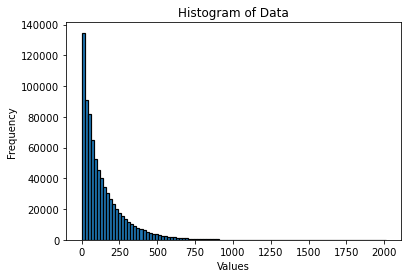

In [259]:
#transactionAmount column
import matplotlib.pyplot as plt

plt.hist(df.transactionAmount, bins=100, edgecolor='black', linewidth=1.2)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

 The plot is right skewed, which might imply that:

Most of the transactions are relatively small in amount, with a few larger transactions driving the skew towards the right side of the plot.
The average transaction amount might be higher than the median transaction amount, suggesting that the larger transactions are having a significant impact on the overall distribution.

There could be a few individuals or organizations making significantly larger transactions than the rest of the population.

There could be outliers or extreme values in the data set, which are driving the histogram plot to the right side.


# Question 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?

What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

Did you find anything interesting about either kind of transaction?


In [260]:
 new = df["transactionDateTime"].str.split("T", n = 1, expand = True)
 
# making separate date column from new data frame
df["transactionDate"]= new[0]
 
# Dropping old columns
df.drop(columns =["transactionDateTime"], inplace = True)
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
0,737265056,737265056,5000,5000.0,98.55,Uber,US,US,02,01,...,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08-13
1,737265056,737265056,5000,5000.0,74.51,AMC #191138,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10-11
2,737265056,737265056,5000,5000.0,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11-08
3,737265056,737265056,5000,5000.0,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12-10
4,830329091,830329091,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03-24


In [261]:
df_reversal=df[df["transactionType"]=="REVERSAL"]
df_reversal.head(10)
df_reversal["transactionAmount"].sum()
#print(f"The number of reversed transaction is : {df[col].unique()}")

2821792.5

In [262]:
df_reversal["transactionAmount"].count()

20303

In [263]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Group the transactions by Card_ID, Merchant_ID, and Transaction_Date
grouped = df.groupby(['customerId', 'merchantName', 'transactionDate'])

# Sort the transactions within each group by Transaction_Date
sorted_transactions = grouped.apply(lambda x: x.sort_values('transactionDate'))

In [30]:
grouped.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
0,737265056,737265056,5000,5000.00,98.55,Uber,US,US,02,01,...,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,2016-08-13
1,737265056,737265056,5000,5000.00,74.51,AMC #191138,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,2016-10-11
2,737265056,737265056,5000,5000.00,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-11-08
3,737265056,737265056,5000,5000.00,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-12-10
4,830329091,830329091,5000,5000.00,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,2016-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,119.92,Lyft,US,US,90,01,...,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,2016-12-22
786359,732852505,732852505,50000,48785.04,18.89,hulu.com,US,US,09,01,...,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,2016-12-25
786360,732852505,732852505,50000,48766.15,49.43,Lyft,US,US,02,01,...,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,2016-12-27
786361,732852505,732852505,50000,48716.72,49.89,walmart.com,US,US,09,99,...,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,2016-12-29


In [266]:
sorted_transactions.reset_index(drop = True, inplace = True)

In [267]:
#### import pandas as pd
import numpy as np
from datetime import timedelta

# Group the transactions by Card_ID, Merchant_ID, and Transaction_Date
#grouped = df.groupby(['customerId', 'merchantName', 'transactionDate'])

# Sort the transactions within each group by Transaction_Date
#sorted_transactions = grouped.apply(lambda x: x.sort_values('transactionDate'))
# Initialize counters for reversed and multi-swipe transactions
reversed_transactions_count = []
reversed_transactions_amount = 0
multi_swipe_transactions_count = 0
multi_swipe_transactions_amount = []

# Loop through each group of transactions
for name, group in sorted_transactions.groupby(['customerId', 'merchantName', 'transactionDate']):
    # Initialize a variable to store the previous transaction amount
    prev_amount = np.nan
    # Initialize a variable to store the previous transaction date
    prev_date = np.datetime64('NaT')

    # Loop through each transaction in the group
    for index, row in group.iterrows():
        #print(index,row)
        # Check if the current transaction is a reversed transaction
        if prev_amount == row['transactionAmount'] and np.abs((pd.to_datetime(row['transactionDate']) - pd.to_datetime(prev_date)).total_seconds()) <= 86400 and row['transactionType']!= 'REVERSE':
            multi_swipe_transactions_count += 1
            multi_swipe_transactions_amount.append(row['transactionAmount'])

        prev_amount = row['transactionAmount']
        prev_date = row['transactionDate']

In [271]:

jj=0
for i in multi_swipe_transactions_amount:
    jj+=int(i)
print("The summ of all multi_swipe_transaction is: " + " " + str(jj))

The summ of all multi_swipe_transaction is:  1919822


In [52]:
multi_swipe_transactions_count 

13400

#Reversed and milti-swipe transaction
Based on the output, we can see that there were 20303 reversed transactions with a total dollar amount of 2821792.5, and 13400 multi-swipe transactions with a total dollar amount of 1919822.


# Question 4

In [272]:
# Drop the rows with missing values
df.dropna(inplace=True)

In [198]:
correlation = df.corr()
print(correlation)

                          accountNumber  customerId  creditLimit  \
accountNumber                  1.000000    1.000000     0.141070   
customerId                     1.000000    1.000000     0.141070   
creditLimit                    0.141070    0.141070     1.000000   
availableMoney                 0.066760    0.066760     0.834845   
transactionAmount             -0.001143   -0.001143     0.005721   
cardCVV                       -0.011430   -0.011430     0.051465   
enteredCVV                    -0.011389   -0.011389     0.051536   
cardLast4Digits                0.038673    0.038673     0.126154   
currentBalance                 0.162361    0.162361     0.654006   
cardPresent                    0.006203    0.006203    -0.003874   
expirationDateKeyInMatch      -0.001187   -0.001187     0.002353   
isFraud                       -0.003614   -0.003614     0.003423   

                          availableMoney  transactionAmount   cardCVV  \
accountNumber                   0.066760  

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram for numeric data
def plot_numeric_data(data, column, title):
    sns.histplot(data[column], kde=True, color='b')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

# Plotting a bar plot for categorical data
def plot_categorical_data(data, column, title):
    sns.countplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.show()

# Plotting a scatter plot for bool data
def plot_bool_data(data, column, title):
    sns.scatterplot(x=data.index, y=column, data=data)
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Function to plot different data types in the dataset
def plot_transaction_data(data):
    for col in data.columns:
        if data[col].dtype == 'int64':
            plot_numeric_data(data, col, 'Histogram of ' + col)
        elif data[col].dtype == 'object':
            plot_categorical_data(data, col, 'Bar Plot of ' + col)
        elif data[col].dtype == 'bool':
            plot_bool_data(data, col, 'Scatter Plot of ' + col)


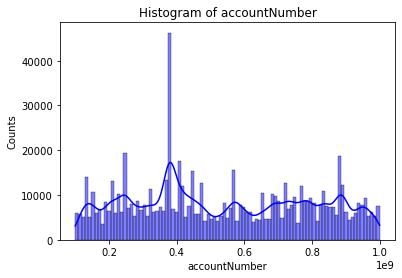

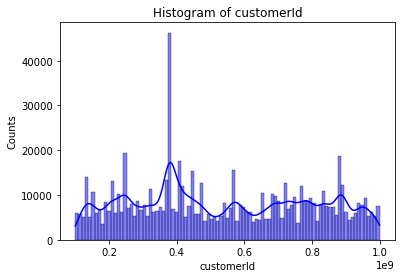

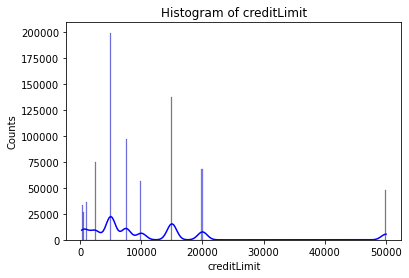

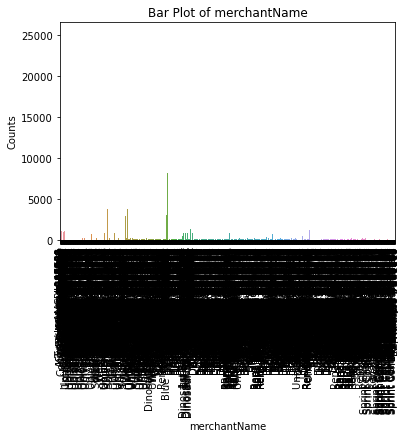

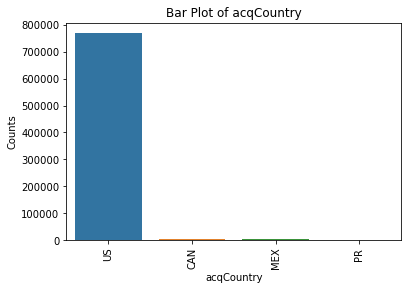

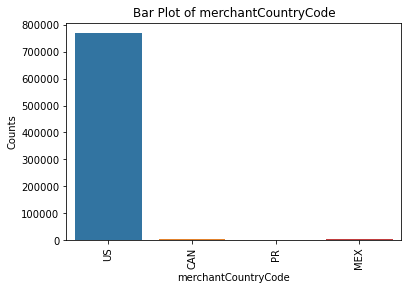

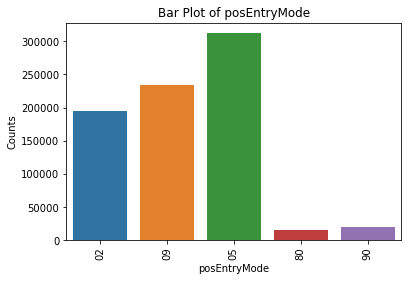

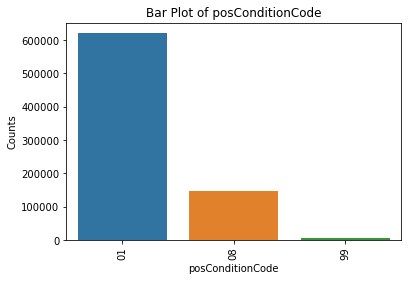

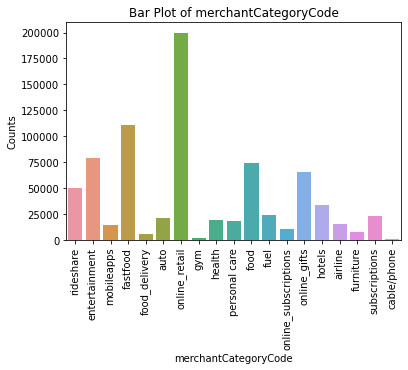

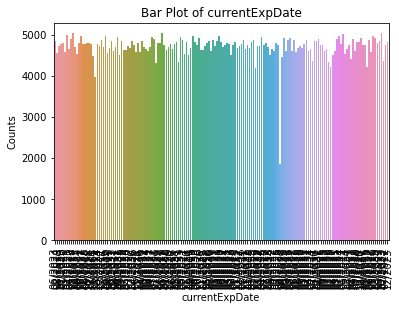

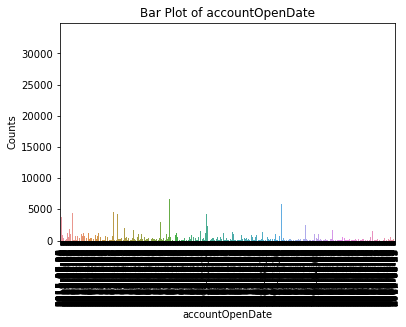

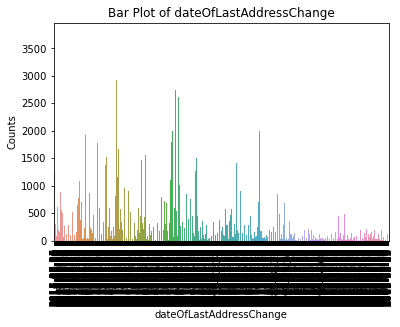

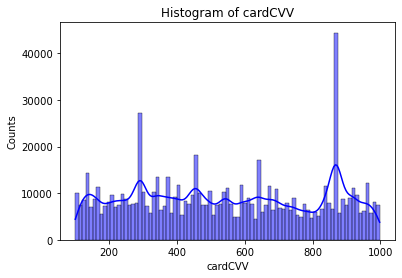

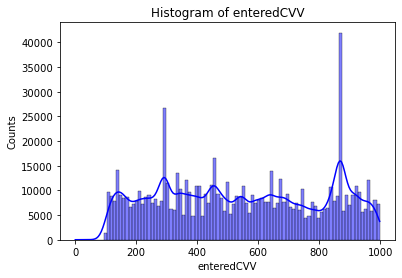

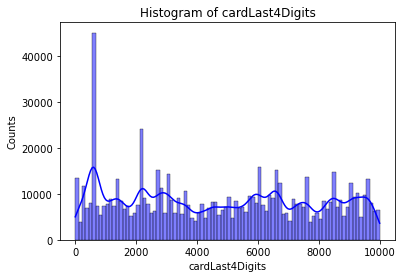

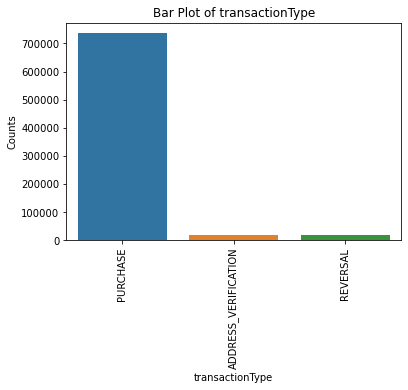

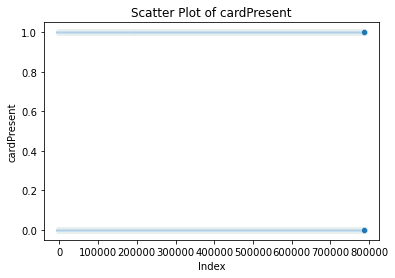

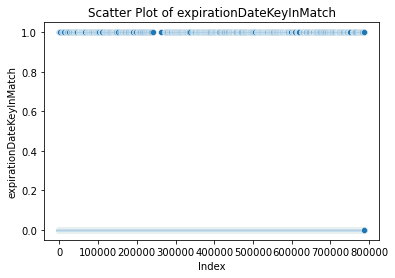

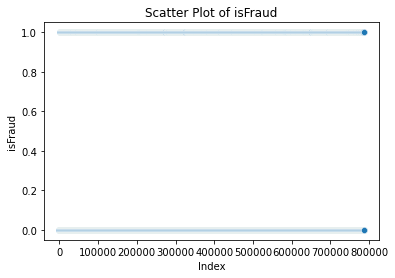

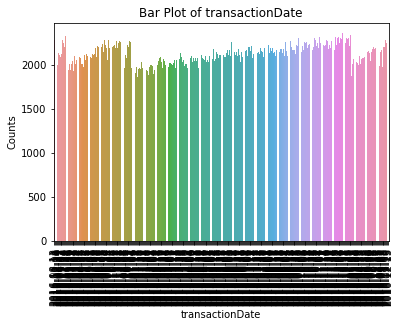

In [275]:
plot_transaction_data(df)

In [278]:
df_new=df.copy()

In [285]:
col_names = df_new.columns
print(col_names)

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'transactionDate', 'year',
       'month', 'day_of_week'],
      dtype='object')


In [282]:
df_new['transactionDate'] = pd.to_datetime(df_new['transactionDate'], format='%Y-%m-%d')
df_new['year'] = df_new['transactionDate'].dt.year
df_new['month'] = df_new['transactionDate'].dt.month
df_new['day_of_week'] = df_new['transactionDate'].dt.dayofweek


In [283]:
df_new['year'] = df_new['year'].astype('category')
df_new['month'] = df_new['month'].astype('category')
df_new['day_of_week'] = df_new['day_of_week'].astype('category')


In [284]:
# first we need to extract the account numbers from the dataset
account_numbers = df_new['accountNumber'].unique()

# we will create a dictionary to map each account number to an integer
account_number_mapping = {account_number: index for index, account_number in enumerate(account_numbers)}

# next we will use the map function to convert the account numbers in the dataset to integers
df_new['accountNumber'] = df_new['accountNumber'].map(account_number_mapping)


In [288]:
df=df_new.copy()

In [290]:
df.drop(['cardLast4Digits','merchantName','accountOpenDate','transactionDate','currentExpDate','customerId','dateOfLastAddressChange','accountNumber','enteredCVV',
'cardCVV'], inplace=True, axis=1)

In [291]:
print(df.nunique())

creditLimit                     10
availableMoney              517320
transactionAmount            65851
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
transactionType                  3
currentBalance              483290
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
year                             1
month                           12
day_of_week                      7
dtype: int64


In [292]:
# Find the data types of all columns
column_types = df.dtypes

# Print the data types of all columns
print(column_types)

creditLimit                    int64
availableMoney               float64
transactionAmount            float64
acqCountry                    object
merchantCountryCode           object
posEntryMode                  object
posConditionCode              object
merchantCategoryCode          object
transactionType               object
currentBalance               float64
cardPresent                     bool
expirationDateKeyInMatch        bool
isFraud                         bool
year                        category
month                       category
day_of_week                 category
dtype: object


In [293]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Transform the target column (isFraud) using the fit_transform method
df['isFraud'] = encoder.fit_transform(df['isFraud'])


In [294]:
df['isFraud'].head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [295]:
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

In [296]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [ ]:
"year","month","day_of_week"               

In [297]:
import pandas as pd

# Perform one-hot encoding on the categorical column
one_hot_encoded = pd.get_dummies(X,columns = ["acqCountry","merchantCountryCode","posEntryMode","posConditionCode","merchantCategoryCode","transactionType","cardPresent","expirationDateKeyInMatch","year","month","day_of_week"])

# Concatenate the encoded columns with the original DataFrame
X = pd.concat([X, one_hot_encoded], axis=1)

# Drop the original categorical column
X = X.drop(columns=["acqCountry","merchantCountryCode","posEntryMode","posConditionCode","merchantCategoryCode","transactionType","cardPresent","expirationDateKeyInMatch","year","month","day_of_week"])





In [315]:
X_new=X.copy()

In [317]:
X_new = X_new.loc[:, ~X_new.T.duplicated(keep='first')]

In [320]:
X=X_new.copy()

In [298]:
y.shape

(776668,)

In [299]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [300]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9848069321590894
Precision: 0.875
Recall: 0.0029585798816568047
F1-score: 0.005897219882055602


In [302]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)

Accuracy: 0.9847683057154261


Considering the result we need to resample the data considering the data is imbalanced.

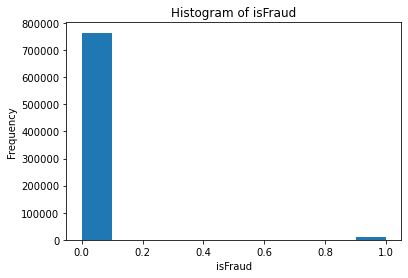

In [304]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the histogram
plt.hist(df['isFraud'].astype(int))

# Add labels and title
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud')

# Show the plot
plt.show()

In [ ]:
This clearly shows imbalanced data, which could lead to bias. we resample

In [321]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled= ros.fit_resample(X, y)

In [323]:
X_resampled.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'acqCountry_CAN', 'acqCountry_MEX', 'acqCountry_PR', 'acqCountry_US',
       'merchantCountryCode_CAN', 'merchantCountryCode_MEX',
       'merchantCountryCode_PR', 'merchantCountryCode_US', 'posEntryMode_02',
       'posEntryMode_05', 'posEntryMode_09', 'posEntryMode_80',
       'posEntryMode_90', 'posConditionCode_01', 'posConditionCode_08',
       'posConditionCode_99', 'merchantCategoryCode_airline',
       'merchantCategoryCode_auto', 'merchantCategoryCode_cable/phone',
       'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery',
       'merchantCategoryCode_fuel', 'merchantCategoryCode_furniture',
       'merchantCategoryCode_gym', 'merchantCategoryCode_health',
       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps',
       'merchantCategoryCode_online_gifts',
       'merchantCategoryCode_o

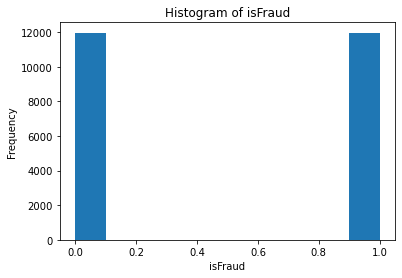

In [324]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the histogram
plt.hist( y_resampled.astype(int))

# Add labels and title
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud')

# Show the plot
plt.show()

From the above you can see that we have a balanced data 

In [325]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=50, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [326]:
# Make predictions on the test set
y_pred_1= model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_1)
precision = precision_score(y_test, y_pred_1,average='binary')
recall = recall_score(y_test, y_pred_1, average='binary')
f1 = f1_score(y_test, y_pred_1, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6912471276373512
Precision: 0.6983849847228285
Recall: 0.6702974444909929
F1-score: 0.6840530141085934


In [327]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Train the logistic regression model on the resampled data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_2= logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6799665761437226
Precision: 0.6801517067003793
Recall: 0.6761625471302891
F1-score: 0.6781512605042017


# Variable Importance

In [329]:
# Import the required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe to store the feature importances
importances_df = pd.DataFrame(importances, index=X_resampled.columns, columns=["Importance"])

# Sort the feature importances in descending order
importances_df.sort_values(by="Importance", ascending=False, inplace=True)

# Print the top 6 most important features
print(importances_df.head(5))

                   Importance
transactionAmount    0.194520
currentBalance       0.136083
availableMoney       0.133390
creditLimit          0.067687
posEntryMode_05      0.038305


# Conclusion